
# It’s Still Not the Day for Equal Pay
MIT License: https://opensource.org/licenses/MIT
### Cassandra Overney and Khang Vu
This notebook uses data from the Current Population Survey in order to compare female income to that of males over the last three decades. We will examine 
- How do the proportions of median weekly female income to median weekly white male income compare for different races and from 1979 to 2018? Can we predict what the proportions would be in 2019?
- What factors (i.e. education, occupation, industry) have the most impact on wage/salary income? How does sex impact income after controlling for those factors?
- For specific occupations, how does pay gap and percentage of working women change over time (from 2003 to 2018)?

## Table of Contents
- [1. Overview of the Data](#1.-Overview-of-the-Data)
    - [1.1 CPS and BLS](#1.1-CPS-and-BLS)
    - [1.2 IPUMS](#1.2-IPUMS)
- [2. Pay Gap between Different Races and Genders](#2.-Pay-Gap-between-Different-Races-and-Genders)
    - [2.1 Data Cleaning](#2.1-Data-Cleaning)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Female Income Compared to White Male Income for Different Races](#2.3-Female-Income-Compared-to-White-Male-Income-for-Different-Races)
- [3. Other Variables that Relate to Income](#3.-Other-Variables-that-Relate-to-Income)
    - [3.1 Data Cleaning](#3.1-Data-Cleaning)
    - [3.2 Data Mining](#3.2-Data-Mining)
    - [3.3 Estimate of Pay Gap after Controlling for Other Variables](#3.3-Estimate-of-Pay-Gap-after-Controlling-for-Other-Variables)
    - [3.4 Prediction of Female and Male Incomes from Regression ](#3.4-Prediction-of-Female-and-Male-Incomes-from-Regression-)
    - [3.5 Income Comparisons of Respondents with and without Disabilities](#3.5-Income-Comparisons-of-Respondents-with-and-without-Disabilities)
    - [3.6 Pay Gap Comparisons of Respondents with and without Disabilities](#3.6-Pay-Gap-Comparisons-of-Respondents-with-and-without-Disabilities)
15. [4. Gender, Income, and Occupation Time Analysis](#4.-Gender,-Income,-and-Occupation-Time-Analysis)
    - [4.1 Data Cleaning](#4.1-Data-Cleaning)
    - [4.2 Highest and Lowest Paid Occupations in 2018](#4.2-Highest-and-Lowest-Paid-Occupations-in-2018)
    - [4.3 Data Explorations from 2003 to 2018](#4.3-Data-Explorations-from-2003-to-2018)
- [5. Concluding Remarks](#5.-Concluding-Remarks)
---------------------

## 1. Overview of the Data

In [1]:
# Importing the necessary librariers 
import pandas as pd
import numpy as np
# import re # might be able to remove
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import Holt
import statsmodels.formula.api as smf
import paygap

### 1.1 BLS

We obtained median weekly income data from the Current Population Survey (CPS), which is a monthly survey of 60,000 households conducted by the Bureau of Census for the Bureau of Labor Statistics (BLS). The terms of use can be found [here](https://www.bls.gov/developers/termsOfService.htm). More details can be found in section 6. 

CPS is the primary source of labor force statistics for the US population. The data for median weekly income for males and females of different races can be found [here](https://www.bls.gov/webapps/legacy/cpswktab3.htm). Median weekly incomes are found as annual averages for full-time wage and salary workers 16 years and over and are not seasonally adjusted. Wage and salary workers for earning purposes exclude both the incorporated and the unincorporated self-employed. People who selected more than one race group are excluded. 

Median earnings are found from usual weekly earning distributions, which reflect earnings before taxes and other deductions. The question associated with usual weekly earnings is:

*“I have estimated (your/his/her) usual WEEKLY earnings (as/for (your/his/her) main job as) (AMOUNT) before taxes or other deductions. Does that sound correct?”* 

The term “usual” means as perceived by the respondent. The estimation component of the question is present because respondents can report earnings in the time periods they prefer.   
 
The data for median weekly income for males and females of different occupations can be found [here](https://www.bls.gov/cps/tables.htm). Occupation describes a person's job or the type of work they do and are based on the job they held during the survey [reference week](https://www.bls.gov/cps/definitions.htm#refweek). The median incomes are derived from annual average data.     

### 1.2 IPUMS

For regression analysis, we downloaded respondent CPS data from [IPUMS USA](https://usa.ipums.org/usa/cite.shtml) for 2018.

Furthermore, the licensing agreement for use of IPUMS USA data requires us to provide a citation to our report. We will make sure to add our citation to the [IPUMS bibliography](https://bibliography.ipums.org/) after completing our report. Since IPUMS directly got its 2018 data from the Bureau of Census, the same terms and conditions apply. We did most of our IPUMS analysis on 1.5 million employed full time workers. Since we conducted data mining for many variables, we will introduce the most important ones later on. 

## 2. Pay Gap between Different Races and Genders

In this section, we try to compare male and female incomes from 1979 to 2018 using CPS data. The data contains median weekly incomes for different genders and races. Income values are not adjusted for inflation.  

### 2.1 Data Cleaning

Read in the CPS data, each row corresponds to a particular gender and race

In [2]:
df_race_raw = paygap.ReadCPS('Data/weeklyincome_gender_race_1979to2018.xlsx')

Set the index to Category

In [3]:
df_race_raw = df_race_raw.set_index('Category')
df_race_raw.head()

,Annual 1979,Annual 1980,Annual 1981,Annual 1982,Annual 1983,Annual 1984,Annual 1985,Annual 1986,Annual 1987,Annual 1988,...,Annual 2009,Annual 2010,Annual 2011,Annual 2012,Annual 2013,Annual 2014,Annual 2015,Annual 2016,Annual 2017,Annual 2018
Category,,,,,,,,,,,,,,,,,,,,,
White Women,184.0,203.0,221.0,242.0,254.0,268.0,281.0,294.0,307.0,318.0,...,669.0,684.0,703.0,710.0,722.0,734.0,743.0,766.0,795.0,817.0
Black Women,169.0,185.0,206.0,217.0,232.0,241.0,252.0,264.0,276.0,288.0,...,582.0,592.0,595.0,599.0,606.0,611.0,615.0,641.0,657.0,654.0
Asian Women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,779.0,773.0,751.0,770.0,819.0,841.0,877.0,902.0,903.0,937.0
Hispanic Women,157.0,172.0,190.0,203.0,215.0,223.0,230.0,241.0,251.0,260.0,...,509.0,508.0,518.0,521.0,541.0,548.0,566.0,586.0,603.0,617.0
White Men,298.0,320.0,350.0,375.0,387.0,401.0,418.0,433.0,450.0,465.0,...,845.0,850.0,856.0,879.0,884.0,897.0,920.0,942.0,971.0,1002.0


Generate the year range

In [4]:
years = np.arange(1979, 2019)

### 2.2 Data Exploration

We can then plot the incomes for men and women.

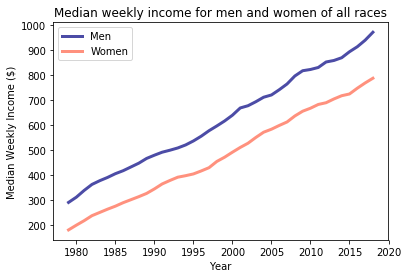

In [16]:
fig, ax = plt.subplots()

male_income = df_race_raw.loc['Men'].values.astype(float)
thinkplot.plot(years, male_income, label='Men', color='navy')

female_income = df_race_raw.loc['Women'].values.astype(float)
thinkplot.plot(years, female_income, label='Women', color='tomato')

# Decorate the plot
thinkplot.Config(xlabel='Year', 
                 ylabel='Median Weekly Income ($)', 
                 title='Median weekly income for men and women of all races')

Both lines display a positive relationship with income and year. Male income is consistently higher than female income by around \\$100. 

We can also plot the median incomes for differenct races (white, black, asian, and hispanic).

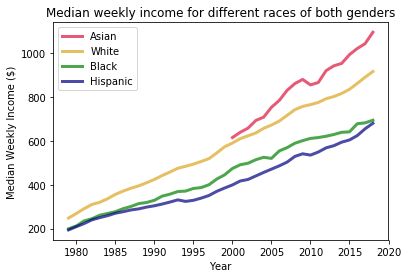

In [17]:
fig, ax = plt.subplots()

races = ['Asian', 'White', 'Black', 'Hispanic']
for race in races:
    income = df_race_raw.loc[race].values.astype(float)
    thinkplot.plot(years, income, label=race, color=paygap.GetColor())

# Decorate the plot
thinkplot.Config(xlabel='Year', 
                 ylabel='Median Weekly Income ($)', 
                 title='Median weekly income for different races of both genders')

The incomes of white people are consistently higher than the incomes of black and Hispanic people. After 2000, data for Asian people exist, and they have higher incomes than all other races.       

We combine the gender and race variables to answer the question:

How do the income distributions by race look like for each gender?

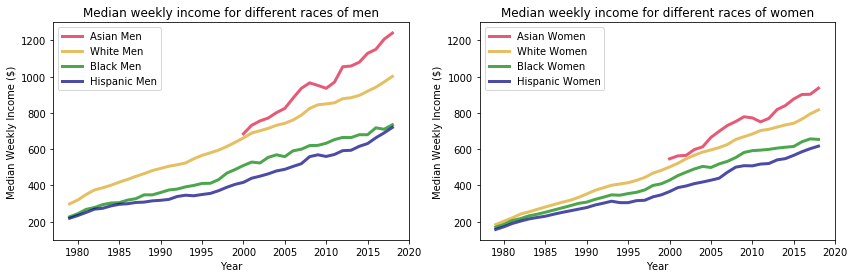

In [18]:
fig, axarr = plt.subplots(1, 2, figsize=(14,4))

race_groupby = {'men' : ['Asian Men', 'White Men', 'Black Men', 'Hispanic Men'], 
         'women' : ['Asian Women', 'White Women', 'Black Women', 'Hispanic Women']}
for i, gender in enumerate(['men', 'women']):
    for race in race_groupby[gender]:
        income = df_race_raw.loc[race].values.astype(float)
        axarr[i].plot(years, income, label=race, color=paygap.GetColor(), linewidth=3, alpha=0.7)
        axarr[i].set_title('Median weekly income for different races of ' + gender)
        axarr[i].set(ylim=(100, 1300), xlabel='Year', ylabel='Median Weekly Income ($)')
        axarr[i].legend()

For both genders, Asian people have the highest median weekly incomes followed by white people, black people, and then Hispanic people. When we compare the two graphs we can see the following observations:
- The incomes of Hispanic and black men are similar to the incomes of Hispanic and black women.
- The incomes of white men are around \\$100 higher than the incomes of white women.  
- The incomes of Asian men are around \\$200 higher than the incomes of Asian women. 

### 2.3 Female Income Compared to White Male Income for Different Races

To better visualize the pay gap between men and women, we plot the proportion of female income compared to white male income for each race. We picked white male income since it is the highest weekly income and is represented for the entire time period. 

Extract the values of the white male income row and find proportions of female median weekly income to male median weekly income for each year and race

In [20]:
white_male_income = df_race_raw.loc['White Men'].values
white_female_income_prop = df_race_raw.loc['White Women'].values/white_male_income
black_female_income_prop = df_race_raw.loc['Black Women'].values/white_male_income
asian_female_income_prop = df_race_raw.loc['Asian Women'].values/white_male_income
hispanic_female_income_prop = df_race_raw.loc['Hispanic Women'].values/white_male_income

Create another DataFrame with calculated values

In [21]:
d = {'Years': years, 
     'Asian Women': asian_female_income_prop.astype(float), 
     'White Women': white_female_income_prop.astype(float), 
     'Black Women': black_female_income_prop.astype(float), 
     'Hispanic Women': hispanic_female_income_prop.astype(float)}
df_race = pd.DataFrame(d)
df_race.head()

,Years,Asian Women,White Women,Black Women,Hispanic Women
0,1979,NaN,0.617450,0.567114,0.526846
1,1980,NaN,0.634375,0.578125,0.537500
2,1981,NaN,0.631429,0.588571,0.542857
3,1982,NaN,0.645333,0.578667,0.541333
4,1983,NaN,0.656331,0.599483,0.555556


Plot the columns of the new DataFrame

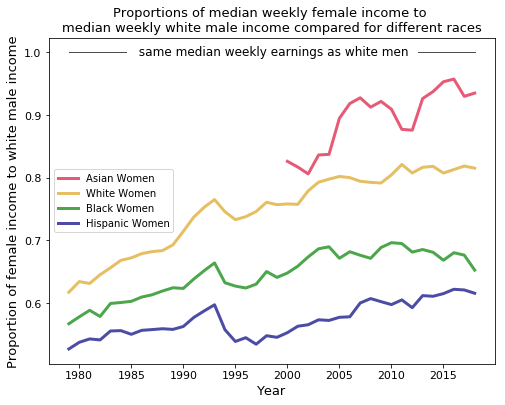

<Figure size 576x432 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot female data across different races
for col in df_race:
    if col != 'Years':
        thinkplot.Plot(df_race['Years'], df_race[col], label=col, color=paygap.GetColor())

# Plot white men income (horizontal line at 1.0)
xs = np.arange(years.min(), years.max() + 1)
ys = np.zeros(len(xs)) + 1
thinkplot.Plot(xs,  ys, color='black', lineWidth=1)
plt.text(x=1985, y=0.995, s='  same median weekly earnings as white men ', bbox=dict(facecolor='white', alpha=1, edgeColor='white'), fontsize=12)

# Decorate the plot
thinkplot.Config(xlabel='Year', 
                 ylabel='Proportion of female income to white male income', 
                 title='Proportions of median weekly female income to \nmedian weekly white male income compared for different races')
thinkplot.set_font_size(13, 13, 11, 11)
thinkplot.Show()

None of the lines have proportions greater than or equal to 1. Asian women income is closest to white male income with proportions ranging from around 0.8 to 0.95. White women have proportions ranging from 0.6 to 0.8. Black and Hispanic women make a little more than half of what white men make. 

Though the pay gap has narrowed over time, it is still divided by race. In recent years, race plays an even larger role in explaining the pay gap than it did 40 years ago. While white and Asian female incomes have moved much closer to white male incomes, black and Hispanic women have not seen as much of a decrease in their pay gaps. This could be due to differences in occupations and education levels.  

#### 2019 Prediction

We use the [Holt Winter’s Exponential Smoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.Holt.html?highlight=holt) provided by the StatsModels library to predict the pay gap between white men and women of different races in 2019. This method extends Simple Exponential Smoothing and is suitable for univariate time series with trend and/or seasonal components.

For example, we can find the predicted value for white women in 2019 as follows:

In [25]:
df_race['White Women'].tail()

35    0.818283
36    0.807609
37    0.813163
38    0.818744
39    0.815369
Name: White Women, dtype: float64

In [26]:
fit = Holt(df_race['White Women'], damped=True, exponential=True).fit()
fit.predict(len(df_race['White Women']))

40    0.81684
dtype: float64

In 2019, the proportion of white women's median weekly income to white men's will be about 0.82.

Next, we use this function to compute the predicted values for women of other races and plot the results on the same graph.

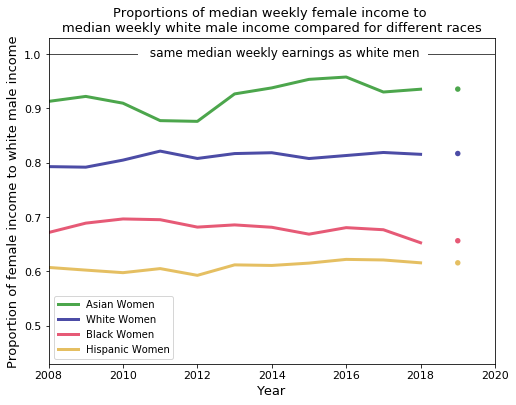

<Figure size 576x432 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot female data across different races
for col in df_race:
    if col != 'Years':
        # Predict pay gap next year, 2019
        y = df_race[col].dropna()
        y.index -= y.index.min() # Re-start index at 0
        fit = Holt(y, damped=True, exponential=True).fit()
        fcast = fit.predict(len(y))
        
        color = paygap.GetColor()
        thinkplot.Plot(df_race['Years'], df_race[col], label=col, color=color) # data
        thinkplot.Scatter([2019], fcast, color=color, alpha=0.7) # prediction

# Plot white men income (horizontal line at 1.0)
xs = np.arange(years.min(), years.max() + 3)
ys = np.zeros(len(xs)) + 1
thinkplot.Plot(xs,  ys, color='black', lineWidth=1)
plt.text(x=2010.5, y=0.995, s='  same median weekly earnings as white men ', bbox=dict(facecolor='white', alpha=1, edgeColor='white'), fontsize=12)

# Decorate the plot
thinkplot.Config(xlabel='Year', 
                 xlim=(2008, 2020), ylim=(0.43, 1.03),
                 ylabel='Proportion of female income to white male income', 
                 title='Proportions of median weekly female income to \nmedian weekly white male income compared for different races')
thinkplot.set_font_size(13, 13, 11, 11)
thinkplot.Show()

We predict that the pay gaps for 2019 will be similar to what they were in 2018. The biggest positive change can be seen within the black women group.

In section 2, we found that income is related to gender and race. Men tend to make more than women. Asian and white people tend to make more than black and Hispanic people. Gender and race are most likely not the only two variables that are associated with income. Section 3 involves investigating what other variables relate to income using the 2018 IPUMS USA dataset.

## 3. Other Variables that Relate to Income


### 3.1 Data Cleaning

Read in IPUMS 2017 data.

In [43]:
work_force = pd.read_csv('Data/ipums_2017.csv.zip')
work_force.head()

,HHWT,REGION,STATEFIP,COUNTYFIP,METRO,MET2013,CITY,CITYERR,PUMA,CPUMA0010,...,DIFFHEAR,PWSTATE2,PWCOUNTY,PWMET13,PWTYPE,PWPUMA00,TRANWORK,TRANTIME,DEPARTS,ARRIVES
0,45,32,1,0,0,0,0,0,1800,13,...,0,1,117,13820,5,1200,10,50,642,734
1,136,32,1,0,0,0,0,0,2400,16,...,0,13,0,0,5,1700,10,45,1805,1849
2,19,32,1,0,0,0,0,0,2500,16,...,0,1,0,0,9,2500,10,25,717,744
3,21,32,1,0,0,0,0,0,500,2,...,0,1,0,0,9,290,10,60,602,704
4,21,32,1,0,0,0,0,0,500,2,...,0,1,0,0,9,290,10,85,702,829


We want to look at respondents who work more than 30 hours a week for at least 27 weeks in 2017.

In [44]:
work_force = work_force[work_force['UHRSWORK'] >= 30] # Usual hours worked per week
work_force = work_force[work_force['WKSWORK2'] >= 3] # Weeks worked last year (level)

Replace special encoded values with NaN:

In [45]:
work_force['UHRSWORK'].replace([0], np.nan, inplace=True)
work_force['INCWAGE'].replace([0, 999999, 999998], np.nan, inplace=True)

Replace weeks worked last year, `WKSWORK2`, with the mean value in the interval. Specifically, replace:
- 0	= N/A (or Missing) with NaN
- 1	= 1-13 weeks with 7
- 2	= 14-26 weeks with 20
- 3	= 27-39 weeks with 33
- 4	= 40-47 weeks with 43.5
- 5	= 48-49 weeks with 48.5
- 6	= 50-52 weeks with 51.5

In [46]:
work_force['WKSWORK'] = work_force['WKSWORK2'].replace([0, 1, 2, 3, 4, 5, 6], [np.nan, 7, 20, 33, 43.5, 48.5, 51.5], inplace=False)

With annual income wage, weeks worked in year, and usual hours worked per week, we can compute the hourly income wage. We eliminate all hourly income values below $2.0 because most of them are probably errors.

In [47]:
work_force['HRLY_INCWAGE'] = work_force['INCWAGE']/(work_force['UHRSWORK'] * work_force['WKSWORK'])
work_force = work_force[work_force['HRLY_INCWAGE'] > 2] # Only consider those who earn > $2.0 hourly
work_force = work_force.dropna()

In [48]:
work_force['HRLY_INCWAGE'].head()

0    17.799353
1    33.287101
2    11.650485
3    21.035599
4    27.669903
Name: HRLY_INCWAGE, dtype: float64

### 3.2 Data Mining

We run regression to see which explanatory variables can better predict hourly income. For each variable, we construct a model, compute $R^{2}$, and append the results to a list. The higher the $R^{2}$ value, the more predictive power the corresponding variable has. 

In [49]:
t = []
for name in work_force.columns:
    formula = 'HRLY_INCWAGE ~ ' + name
    model = smf.ols(formula, data=work_force)
    if model.nobs < len(work_force)/2:
        continue

    results = model.fit()
        
    t.append((results.rsquared, name))

In [51]:
t.sort(reverse=True)
for r2, name in t[2:10]:
    print(name, r2)

EDUC 0.11627210702436874
DEGFIELD 0.0951023297375887
OCC2010 0.07549323581942147
MARST 0.03760606125612209
AGE 0.033228751535220535
YRMARR 0.029945658063642355
RELATE 0.020329427202418704
SEX 0.015630218428316134


Variables that affect income the most are: education `EDUC`, field of degree `DEGFIELD`, occupation `OCC2010`, marital status `MARST`, age `AGE`, year of marriage  `YRMARR`, and sex `SEX`. For example, education accounts for around 12% of the variance in hourly income and sex accounts for around 2%. We will look into some of these variables in the next sections.

### 3.3 Estimate of Pay Gap after Controlling for Other Variables

In [52]:
# Build formula
formula = 'HRLY_INCWAGE ~ '
ignores = ['HRLY_INCWAGE', 'SEX', 'UHRSWORK', 'WKSWORK2', 'WKSWORK', 'INCWAGE', 'INCEARN', 'INCTOT', 'OCCSCORE', 'SEI', 'SERIAL', 'CBSERIAL', 'GQ', 'PERNUM', 'PERWT', 'HHWT', 'RACE', 'HISPAN', 'EDUC', 'DEGFIELD2', 'EMPSTATD', 'HRLY_INCWAGE']
for col in work_force.columns:
    if col in ignores:
        continue

    formula += col + ' + '
    
formula = formula[:-3]

In [53]:
model = smf.ols(formula, data=work_force)
results = model.fit()
results.rsquared

0.19682939603279337

In [54]:
formula_sex = formula + ' + C(SEX)'

In [55]:
model = smf.ols(formula_sex, data=work_force)
results = model.fit()
results.rsquared

0.215880122285528

Even after controlling for the variables that affect income the most, the r-squared value increased by around 2% with gender. We can also find the pay gap. 

In [56]:
results.params['C(SEX)[T.1]']

8.288933172286253

Men earn \\$8 more than women per hour. 

### 3.4 Prediction of Female and Male Incomes from Regression 

As an example, we explore the relationship between age and mean hourly income. First, we group the respondents by age and find the mean income in each age group. Then, we run regression on the results and use the regression model to compute the male and female hourly income when controlling for age.

In [57]:
# Group by AGE and compute the mean income
grouped = work_force.groupby('AGE')
mean_income_by_group = grouped['HRLY_INCWAGE'].mean()

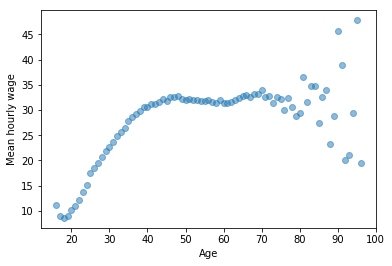

In [62]:
# Plot the result
fig, ax = plt.subplots()
ax.set(ylabel='Mean hourly wage', xlabel='Age')
_ = ax.plot(mean_income_by_group, 'o', alpha=0.5)

Because this relationship, as well as other relationships we explore later, is non-linear, we use the quartic function to build our regression model.

Build the regression model:

In [63]:
col = 'AGE'
work_force_pow4 = work_force.copy()
work_force_pow4[col+'2'] = work_force[col]**2
work_force_pow4[col+'3'] = work_force[col]**3
work_force_pow4[col+'4'] = work_force[col]**4

formula = 'HRLY_INCWAGE ~ C(SEX) + AGE + AGE2 + AGE3 + AGE4'
model = smf.ols(formula, data=work_force_pow4)
results = model.fit()

Create a new data frame and predict male and female income when controlling for age.

In [64]:
df = pd.DataFrame()
df[col] = np.linspace(work_force_pow4[col].min(), work_force_pow4[col].max(), len(work_force_pow4[col]))
df[col+'2'] = df[col]**2
df[col+'3'] = df[col]**3
df[col+'4'] = df[col]**4

df['SEX'] = 1
pred_male = results.predict(df)

df['SEX'] = 0
pred_female = results.predict(df) 

Plot the result

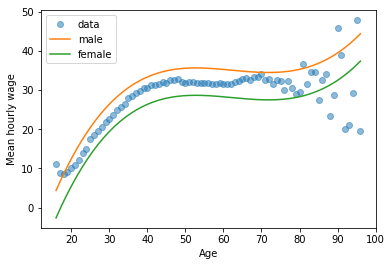

In [66]:
fig, ax = plt.subplots()
ax.plot(mean_income_by_group, 'o', alpha=0.5, label='data')
ax.set(ylabel='Mean hourly wage', xlabel='Age')
ax.plot(df[col], pred_male, label='male')
ax.plot(df[col], pred_female, label='female')
_ = ax.legend()

Female hourly income is lower than male hourly income for different ages. The pay gap is wider for middle-aged and older people.

Using the same approach, we look into other variables and pick some that seem to have interesting relationships.

In [69]:
variables = ['AGE', 'EDUC', 'ELDCH', 'NCHILD', 'UHRSWORK', 'WKSWORK', 'YRSUSA1', 'TRANTIME', 'DEPARTS']
variables_describe = ['Age', 'Education', 'Age of eldest child', 'Number of children', 'Usual hours worked per week', 'Weeks worked last year (approximate)', 'Years in the US', 'Travel time to work', 'Time of departure for work']

In [68]:
work_force_pow4 = work_force.copy()
for var in variables:
    for power in '234':
        work_force_pow4[var+power] = work_force_pow4[var]**int(power)

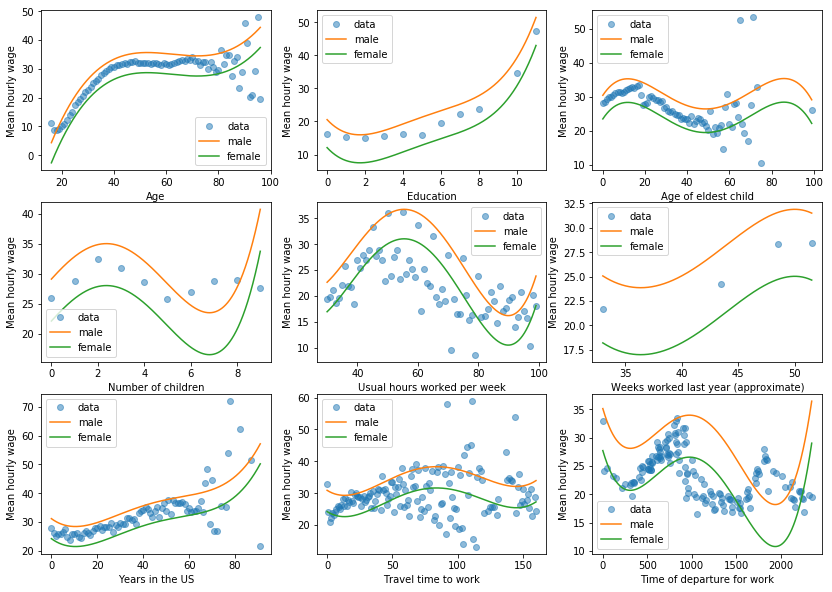

In [70]:
fig, axarr = plt.subplots(3, 3, figsize=(14,10))
for i in range(3):
    for j in range(3):
        paygap.PlotDataWithRegression(ax=axarr[i, j], work_force=work_force_pow4, col=variables[i*3+j], col_describe=variables_describe[i*3+j])

For all of these plots, men earn more than women per hour. Also, higher education helps narrow the pay gap a bit.

### 3.5 Income Comparisons of Respondents with and without Disabilities

Here are variables for people with disabilities:
- `DIFFHEAR`: 'Hearing difficulty'
- `DIFFEYE`: 'Vision difficulty'
- `DIFFCARE`: 'Self-care difficulty'
- `DIFFREM`: 'Cognitive difficulty'

Response code:
- 0 = Does not have a disability
- 1 = Have a disability

Create a list for these variables and a Data Series `is_disabled` as a lookup column of respondents having any of the difficulties.

In [86]:
diff_vars = ['DIFFHEAR', 'DIFFEYE', 'DIFFCARE', 'DIFFREM']
diff_vars_describe = ['Hearing difficulty', 'Vision difficulty', 'Self-care difficulty', 'Cognitive difficulty']
is_disabled = (work_force["DIFFHEAR"] == 1) | (work_force["DIFFEYE"] == 1) | (work_force["DIFFPHYS"] == 1) | (work_force["DIFFCARE"] == 1) | (work_force["DIFFMOB"] == 1) | (work_force["DIFFREM"] == 1)

First, we create a DataFrame for those respondents who do not have any disability. We also include the `HRLY_INCWAGE` column in this DataFrame.

In [88]:
non_disabled = work_force[["HRLY_INCWAGE"] + diff_vars].copy()
non_disabled = non_disabled[~is_disabled]

Next, we create a Data Frame to store the hourly income, `HRLY_INCWAGE`, of non-disabled people.

In [89]:
diff_df = work_force[["SEX"]].copy() # SEX is a dummy variable to keep the index column
diff_df["No difficulties"] = non_disabled["HRLY_INCWAGE"]

Similarly, we also create a DataFrame for each group of disabled people and add them to `diff_df`.

In [90]:
for i, col in enumerate(diff_vars):
    disabled = work_force.copy()
    disabled = disabled[disabled[col] == 1]
    # Add a column to diff_df
    diff_df[diff_vars_describe[i]] = disabled["HRLY_INCWAGE"]

Finally, we plot the result using Box Plot.

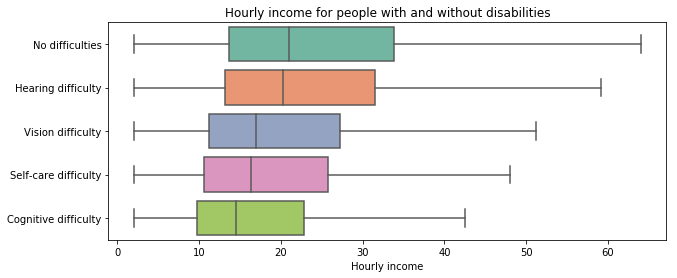

In [91]:
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.boxplot(data=diff_df.drop(['SEX'], axis=1), orient="h", palette="Set2", showfliers=False)
_ = ax.set(xlabel="Hourly income", title="Hourly income for people with and without disabilities")

Respondents with no difficulties have higher median, 25th percentile, and 75th percentile hourly incomes than respondents with difficulties. The hearing difficulty group is more similar to the no difficulties group compared to other difficulties. The cognitive difficulty has the lowest median hourly income.   


### 3.6 Pay Gap Comparisons of Respondents with and without Disabilities

We create a similar `non_disabled` DataFrame as above. This time, we also include the `SEX` column.

In [92]:
work_force["DIFFTOTAL"] = is_disabled
non_disabled = work_force[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
non_disabled = non_disabled[~is_disabled]
non_disabled.head()

,HRLY_INCWAGE,SEX,DIFFTOTAL
0,17.799353,0,False
1,33.287101,1,False
2,11.650485,0,False
3,21.035599,1,False
4,27.669903,0,False


Next, we select people with at least one disability and keep two columns, `HRLY_INCWAGE` and `SEX`.

In [93]:
disabled = work_force[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
disabled = disabled[is_disabled]
disabled.head()

,HRLY_INCWAGE,SEX,DIFFTOTAL
21,2.718447,1,True
52,7.216495,0,True
78,14.147018,0,True
79,11.067961,1,True
139,4.854369,1,True


First, let's look at the distribution of hourly income of the `non_disabled` group.

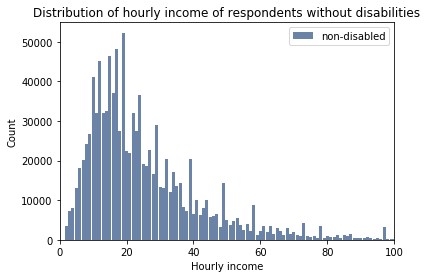

In [95]:
hist_non_disabled = thinkstats2.Hist(np.round(non_disabled["HRLY_INCWAGE"]), label='non-disabled')
thinkplot.hist(hist_non_disabled)
thinkplot.Config(xlim=(0, 100), xlabel="Hourly income", ylabel="Count", title="Distribution of hourly income of respondents without disabilities")

The distribution is highly skewed, so we will use median income to compute the pay gap in each group. Then, we compare the pay gaps between the two groups.

For the `non_disabled` group, we can compute the difference between median hourly income of men and of women as follows:

In [96]:
male_median_non_disabled = non_disabled[non_disabled.SEX == 1]["HRLY_INCWAGE"].median()
female_median_non_disabled = non_disabled[non_disabled.SEX == 0]["HRLY_INCWAGE"].median()
pay_gap_non_disabled = male_median_non_disabled - female_median_non_disabled
print("Male median hourly income\t", male_median_non_disabled)
print("Female median hourly income\t", female_median_non_disabled)
print("Pay gap (Non-disabled)\t\t", pay_gap_non_disabled)

Male median hourly income	 22.94792586054722
Female median hourly income	 19.41747572815534
Pay gap (Non-disabled)		 3.5304501323918807


We do the same thing for the `disabled` group

In [97]:
male_median_disabled = disabled[disabled.SEX == 1]["HRLY_INCWAGE"].median()
female_median_disabled = disabled[disabled.SEX == 0]["HRLY_INCWAGE"].median()
pay_gap_disabled = male_median_disabled - female_median_disabled
print("Male median hourly income\t", male_median_disabled)
print("Female median hourly income\t", female_median_disabled)
print("Pay gap (Disabled)\t\t", pay_gap_disabled)

Male median hourly income	 19.41747572815534
Female median hourly income	 15.782828282828282
Pay gap (Disabled)		 3.6346474453270563


and find the effect size

In [101]:
print('Effect size:', pay_gap_non_disabled - pay_gap_disabled)
print('Relative effect size:', (pay_gap_non_disabled - pay_gap_disabled)/pay_gap_non_disabled)

Effect size: -0.10419731293517565
Relative effect size: -0.029513888888888496


Disabled people earn 3% less than non-disabled people.

#### Compute Confidence Interval of Effect Size

In [103]:
def computePayGap(df):
        male_median = df[df.SEX == 1]["HRLY_INCWAGE"].median()
        female_median = df[df.SEX == 0]["HRLY_INCWAGE"].median()
        return male_median - female_median
    
def computeStatistic(df):
    df = df[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
    is_disabled = df["DIFFTOTAL"]
    
    non_disabled = df[~is_disabled]
    disabled = df[is_disabled]

    pay_gap_non_disabled = computePayGap(non_disabled)
    pay_gap_disabled = computePayGap(disabled)

    return (pay_gap_non_disabled - pay_gap_disabled)
    
def computeCI(work_force, iter=101):
    stats = []
    
    for i in range(iter):
        df = thinkstats2.ResampleRows(work_force)
        stat = computeStatistic(df)
        stats.append(stat)
    
    cdf = thinkstats2.Cdf(stats)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    return ci

In [104]:
computeCI(work_force)

(-0.38834951456310307, 0.1323918799646968)

The confidence interval includes 0. 

#### Compute p-value

The p-value tells us the probability of seeing an effect size greater and or equal to what we observed if there is no difference between the disabled and non disabled groups.  

In [107]:
class ProportionalTest():
    def __init__(self, data):
        self.data = data
        self.actual = self.TestStatistic(data)
        
    def PValue(self, iters=101):
        self.test_stats = [self.TestStatistic(self.RunModel()) for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters
        
    def TestStatistic(self, data):
        return computeStatistic(data)

    def RunModel(self):
        # Copy the data frame
        shuffled_data = self.data.copy()
        # Permutate the rows of the DIFFTOTAL column on the copy
        shuffled_data["DIFFTOTAL"] = np.random.permutation(shuffled_data["DIFFTOTAL"]) 
        
        return shuffled_data

In [108]:
ProportionalTest(work_force).PValue()

0.6138613861386139

The p-value is very high, so the observed effect size may be due to chance. We cannot draw any conclusions regarding statistical significance. 

## 4. Gender, Income, and Occupation Time Analysis

In this section, we delve into the occupation variable, which we couldn't explore in the regression section. For each occupation, we find the proportion of women working in that occupation (percent female), the total weekly median income (total weekly pay or total pay), and the difference in weekly median incomes between men and women (pay gap) from 2002 to 2018. With this data, we can see how different occupations' percent female, total weekly pay, and pay gap vary over time.     

### 4.1 Data Cleaning

The weekly earning data is from the [Current Population Survey](https://www.bls.gov/cps/tables.htm) (table 39 in the weekly earnings section). For each year from 2002 to 2018, we downloaded excel and text versions of the data tables, which are stored in the Data folder in the form of `weeklyincome_occupation_gender_year`. Before doing any analysis, we had to consolidate the data from all 17 years, which we did in another [notebook](https://github.com/coverney/ThinkStats2/blob/master/project2/Women%20Weekly%20Income%20and%20Occupation%20Time%20Analysis%20Data%20Cleaning.ipynb).   

Read in consolidated time series data. There are a few more things to calculate.

In [109]:
df = pd.read_excel('Data/weeklyincome_occupation_gender_combined_clean_all.xlsx')
df = df.set_index('Occupation')

Find changes in percent female, total weekly pay, and pay gap and add to `df` by subtracting values from 2018 by their corresponding 2003 values. Also find percent increases and decreases for percent female change, total weekly pay change, and pay gap change. If the change is negative, that means the value from 2018 is lower than the value from 2003. We can determine the percent **decrease** by dividing the change by the value from 2003. If the change is positive, that means that the value from 2018 is higher than the value from 2003. We can determine the percent **increase** by dividing the change by the value from 2003. Finding relative changes allows us to compare absolute changes between different occupations by adjusting for occupation-based income differences (e.g. doctors tend to make more than janitors).

Besides calculating differences between 2018 and 2003, we also find the slopes of three linear least squares fits with the following conditions:
- x: years, y: percent female
- x: years, y: pay gap
- x: years, y: total pay

The slopes will be used to identify occupations with positive or negative relationships of percent female and pay over time. 

For each occupation, extract the percent female, total weekly pay, and pay gap data arrays. Since the arrays are sorted from 2018 to 2003, calculate the absolute changes by subtracting the first element of each array by the last element. Find the relative changes (percent increase/decrease) by dividing the absolute changes with the data from 2003. Find the slopes with `LeastSquares`. Lastly, update `df` with the calculated values. 

In [110]:
years = range(2003, 2019)
for occ in df.index:
    temp_percent_female = np.asarray(eval(df.loc[occ]['Percent Female']))
    temp_total_pay = np.asarray(eval(df.loc[occ]['Total Weekly Pay']))
    temp_pay_gap = np.asarray(eval(df.loc[occ]['Pay Gap']))
    
    temp_percent_female_change = temp_percent_female[0]-temp_percent_female[-1]
    temp_total_pay_change = temp_total_pay[0]-temp_total_pay[-1]
    temp_pay_gap_change = temp_pay_gap[0]-temp_pay_gap[-1]
    
    temp_percent_female_change_percent = (temp_percent_female_change/temp_percent_female[-1])*100
    temp_total_pay_change_percent = (temp_total_pay_change/temp_total_pay[-1])*100
    temp_pay_gap_change_percent = (temp_pay_gap_change/temp_pay_gap[-1])*100
    
    inter, slope_percent_female = thinkstats2.LeastSquares(years, temp_percent_female[::-1])
    inter, slope_total_pay = thinkstats2.LeastSquares(years, temp_total_pay[::-1])
    inter, slope_pay_gap = thinkstats2.LeastSquares(years, temp_pay_gap[::-1])
    
    df.at[occ, 'Percent Female Change (%)'] = temp_percent_female_change
    df.at[occ, 'Total Weekly Pay Change ($)'] = temp_total_pay_change
    df.at[occ, 'Pay Gap Change ($)'] = temp_pay_gap_change
    df.at[occ, 'Relative Percent Female Change (%)'] = temp_percent_female_change_percent
    df.at[occ, 'Relative Total Weekly Pay Change (%)'] = temp_total_pay_change_percent
    df.at[occ, 'Relative Pay Gap Change (%)'] = temp_pay_gap_change_percent
    df.at[occ, 'Percent Female Slope (%/yr)'] = slope_percent_female
    df.at[occ, 'Total Weekly Pay Slope ($/yr)'] = slope_total_pay
    df.at[occ, 'Pay Gap Slope ($/yr)'] = slope_pay_gap

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


There is a divide by zero warning, which occurs when finding the `Relative Pay Gap Change (%)` for the occupation, Office Clerks General. In 2003, both men and women had a weekly median income of \\$502, which results in a pay gap of \\$0. The absolute pay gap change divided by 0 is `-inf`.  

Display the changes (absolute and relative) for the first three occupations

In [111]:
df.iloc[:3,-6:]

,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Slope (%/yr),Total Weekly Pay Slope ($/yr),Pay Gap Slope ($/yr)
Occupation,,,,,,
Total fulltime wage and salary workers,1.262321,4.414418,-5.984335,0.046152,1.961916,-0.976380
Management professional and related occupations,2.247015,2.639106,-5.329091,0.091603,2.211201,-0.390496
Management business and financial operations occupations,4.081821,3.023036,-21.623411,0.112919,3.131147,-5.238463


### 4.2 Highest and Lowest Paid Occupations in 2018

Before delving into the past, we first need to have a good understanding of the present. One way to do that is to find the percentages of women in the highest and lowest paid occupations in 2018. We start by reading in the cleaned 2018 data file.

In [113]:
df_2018 = paygap.ReadBLS(filename='Data/weeklyincome_occupation_gender_clean_2018.xlsx')
df_2018 = df_2018.set_index('Occupation')
df_2018.head()

,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings
Occupation,,,,,,
Total fulltime wage and salary workers,115567.0,886.0,64142.0,973.0,51425.0,789.0
Management professional and related occupations,48808.0,1246.0,23685.0,1468.0,25123.0,1078.0
Management business and financial operations occupations,19863.0,1355.0,10668.0,1537.0,9195.0,1168.0
Management occupations,13477.0,1429.0,7754.0,1585.0,5724.0,1236.0
Chief executives,1098.0,2291.0,790.0,2488.0,307.0,1736.0


Calculate the percentages of females in each occupation and store results in a `Series`

In [115]:
female_props = (df_2018['2018 Women Number of workers']/df_2018['2018 Total Number of workers'])*100

Create a new `DataFrame` that just contains the occupations, median weekly incomes, and percent females

In [117]:
d = {'Weekly Pay': df_2018['2018 Total Median weekly earnings'], 
     'Percent Female': female_props}
df_2018_result = pd.DataFrame(d)
df_2018_result.head()

,Weekly Pay,Percent Female
Occupation,,
Total fulltime wage and salary workers,886.0,44.497997
Management professional and related occupations,1246.0,51.473119
Management business and financial operations occupations,1355.0,46.292101
Management occupations,1429.0,42.472360
Chief executives,2291.0,27.959927


Sort the `DataFrame` rows by weekly incomes with the higher incomes at the top

In [118]:
df_2018_result = df_2018_result.sort_values(by=['Weekly Pay'], ascending=False)

Display results for highest paid occupations

In [122]:
highest = paygap.ShowTableResult(df_2018_result[:10], title='Percentage of female employees in the 10 highest-paid occupations in America, 2018')
highest

,Weekly Pay,Percent Female
Occupation,,
Chief executives,"$2,291",27.96%
Pharmacists,"$2,071",62.74%
Physicians and surgeons,"$2,001",42.56%
Lawyers,"$1,947",40.33%
Computer and information systems managers,"$1,877",25.46%
Software developers applications and systems software,"$1,864",20.30%
Computer programmers,"$1,591",21.26%
Engineers all other,"$1,575",12.31%
Marketing and sales managers,"$1,567",46.42%


Display results for lowest paid occupations

In [123]:
lowest = paygap.ShowTableResult(df_2018_result[-10:], title='Percentage of female employees in the 10 lowest-paid occupations in America, 2018')
lowest

,Weekly Pay,Percent Female
Occupation,,
Food preparation and serving related occupations,$501,49.70%
Personal care aides,$500,83.21%
Waiters and waitresses,$496,65.56%
Packers and packagers hand,$495,58.16%
Cooks,$486,39.32%
Maids and housekeeping cleaners,$467,87.64%
Cashiers,$465,72.88%
Food preparation workers,$463,56.45%
Dining room and cafeteria attendants and bartender helpers,$447,49.15%


Of the 10 highest paid occupations in America, just four have at least 40% females with only Pharmacists having more than 50% female. Of the 10 lowest paid occupations, they all have at least 40% females. Personal care aides and maids have over 80% female. This shows that women are doing the jobs that pay the least.        

### 4.3 Data Explorations from 2003 to 2018

To begin, we write some helper functions to visualize our data. `plot_percent_female` plots percent female against year for inputted occupations. 

In [129]:
def plot_percent_female(df, occs, colors, title):
    fig, ax = plt.subplots()
    years = range(2003, 2019)
    for index, occ in enumerate(occs):
        percent_female = np.asarray(eval(df.loc[occ]['Percent Female']))[::-1]
        thinkplot.Plot(years, percent_female, label=occ, color=colors[index])
    thinkplot.Config(xlabel='Year', ylabel='% Female in Occupation', title=title)
    thinkplot.Show()

`plot_percent_female_pay_gap` plots a two-scale plot of pay gap and percent female versus year. (We need to flip the data arrays since they are ordered in reverse chronological order.) 

In [130]:
def plot_percent_female_pay_gap(df, occ, title):
    fig, ax_percent_female = plt.subplots()
    color = 'tab:blue'
    ax_percent_female.set_xlabel('Year')
    ax_percent_female.xaxis.labelpad = 15
    ax_percent_female.set_ylabel('% Female in Workforce', color=color)
    years= range(2003, 2019)

    # Percent female plot
    percent_female = np.asarray(eval(df.loc[occ]['Percent Female']))[::-1]
    line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
    ax_percent_female.tick_params(axis='y', labelcolor=color)
    ax_percent_female.yaxis.labelpad = 10

    ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

    # Pay gap plot
    pay_gap = np.asarray(eval(df.loc[occ]['Pay Gap']))[::-1]
    line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
    ax_pay_gap.tick_params(axis='y', labelcolor=color)
    ax_pay_gap.yaxis.labelpad = 10

    ax_pay_gap.title.set_text(title)
    lines = line_percent_female + line_pay_gap
    labels = [l.get_label() for l in lines]
    ax_percent_female.legend(lines, labels)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

`plot_percent_female_total_pay` plots a two-scale plot of total pay and percent female versus year.

In [144]:
def plot_percent_female_total_pay(df, occ, title):
    fig, ax_percent_female = plt.subplots()
    color = 'tab:blue'
    ax_percent_female.set_xlabel('Year')
    ax_percent_female.xaxis.labelpad = 15
    ax_percent_female.set_ylabel('% Female in Workforce', color=color)

    years= range(2003, 2019)

    # Percent female plot
    percent_female = np.asarray(eval(df.loc[occ]['Percent Female']))[::-1]
    line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
    ax_percent_female.tick_params(axis='y', labelcolor=color)
    ax_percent_female.yaxis.labelpad = 10

    ax_total_pay = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax_total_pay.set_ylabel('Weekly Median Income ($)', color=color) # we already handled the x-label with ax_percent_female

    # Pay gap plot
    total_pay = np.asarray(eval(df.loc[occ]['Total Weekly Pay']))[::-1]
    line_total_pay = plt.plot(years, total_pay, label='Total Pay', color=color, marker='o')
    ax_total_pay.tick_params(axis='y', labelcolor=color)
    ax_total_pay.yaxis.labelpad = 10

    ax_total_pay.title.set_text(title)
    lines = line_percent_female + line_total_pay
    labels = [l.get_label() for l in lines]
    ax_percent_female.legend(lines, labels)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

Before we delve into the data for each occupation, we look at how percent female, total weekly pay, and pay gap change for all occupations. This data is represented by the occupation `Total fulltime wage and salary workers`.

In [133]:
df.loc['Total fulltime wage and salary workers'][-9:-3]

Percent Female Change (%)               0.554706
Total Weekly Pay Change ($)              37.4582
Pay Gap Change ($)                      -11.7121
Relative Percent Female Change (%)       1.26232
Relative Total Weekly Pay Change (%)     4.41442
Relative Pay Gap Change (%)             -5.98433
Name: Total fulltime wage and salary workers, dtype: object

In general the pay gap decreased by 6.0%, total weekly pay increased by 4.4%, and the proportion of women in the work force increased by 1.3%. A lower pay gap means that in 2018 the difference between the median weekly male income and median weekly female income is lower than it was in 2003. We can create a two-scale plot of pay gap and percent female versus year.

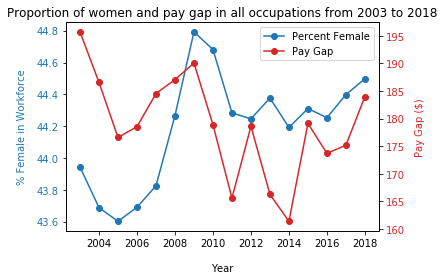

In [134]:
title = 'Proportion of women and pay gap in all occupations from 2003 to 2018'
plot_percent_female_pay_gap(df, 'Total fulltime wage and salary workers', title)

The blue vertical axis and line corresponds to percent female in the workforce, while the red vertical axis and line corresponds to pay gap. Percent female increases from 2003 to 2018, especially between 2005 and 2009. In 2009, percent female peaks before stabilizing to around 44.3%. In recent years (2016-2018), percent female seems to be on the rise. In general, percent female does not change drastically with a scale from 43.6% to 44.8%.  

On the other hand, pay gap fluctuates more widely (from \\$160 to \\$195) in the same time range, especially between 2011 and 2015. Compared to 2003, the pay gap decreased by around \\$10. However, compared to 2016, the pay gap increased by around \\$10. 

`df` contains information for almost 100 occupations! To get a better understanding of how percent female, total pay, and pay gap compares for different occupations, we split the data into sub-sections corresponding to positive/negative values of percent female change, total weekly pay change, and pay gap change. Analysis is first done on occupations with positive values of percent female change and then on occupations with negative values of percent female change.    

#### 4.3.1 Occupations with More Women Entering

First we create a new `DataFrame` that contains all of the occupations with a positive percent female change and positive slope between percent female and year.

In [135]:
df_percent_female_pos = df[(df['Percent Female Change (%)'] > 0) & ((df['Percent Female Slope (%/yr)'] > 0))]
print('Number of occupations:', df_percent_female_pos.shape[0])

Number of occupations: 46


That's quite a few occupations! Let's order them in descending order by relative percent female change.

In [137]:
df_percent_female_pos_sorted = df_percent_female_pos.sort_values(by=['Relative Percent Female Change (%)'], ascending=False)

We can plot the first five occupations with percent female against year

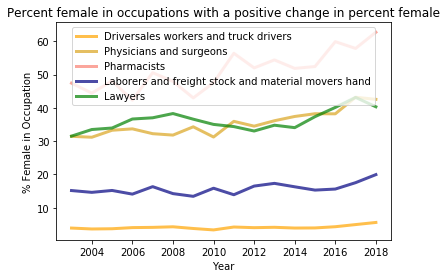

<Figure size 576x432 with 0 Axes>

In [138]:
colors = ['orange', 'goldenrod', 'salmon', 'navy', 'green', 'crimson', 'purple', 'blue', 'black', 'cyan']
occs = df_percent_female_pos_sorted.index[:5]
title = 'Percent female in occupations with a positive change in percent female'
plot_percent_female(df_percent_female_pos_sorted, occs, colors, title)

The following observations can be made from the above figure:
- It is important to compare relative changes. Driversales workers and truck drivers has the highest relative increase in percent female (43.6%) but has much lower percent female values compared to other occupations (5% compared to more than 15%). 
- There is a divide between the three occupations from 30% to 60% and the two occupations below 20%. This divide also distinguishes high income from low income jobs. Driversales workers and laborers have lower median incomes compared to physicians, pharmacists, and lawyers (\\$700 vs \\$2000). Less women chose these jobs because they have have lower pay and are typically associated with men.  
- The pharmacists occupation surpasses 50% after 2011 and continues to steadily increase with time.

#### 4.3.2 Occupations with More Women Entering but Lower Total Pay

We create another `DataFrame` that contains all of the occupations with a positive percent female change (and percent female slope) and negative total weekly pay change (and total pay slope). This subset can be used to provide evidence for the observation that when women become more represented in a job, the pay for that job tends to go down.  

In [139]:
df_percent_female_pos_total_pay_neg = df_percent_female_pos[(df_percent_female_pos['Total Weekly Pay Change ($)'] < 0) & (df_percent_female_pos['Total Weekly Pay Slope ($/yr)'] < 0)]
print('Number of occupations:', df_percent_female_pos_total_pay_neg.shape[0])

Number of occupations: 16


There are a few. Let's order them in ascending order by `Relative Total Weekly Pay Change (%)`

In [140]:
df_percent_female_pos_total_pay_neg_sorted = df_percent_female_pos_total_pay_neg.sort_values(by=['Relative Total Weekly Pay Change (%)'], ascending=True)

Before visualizing total weekly pay, we pick a few occupations from the above data table with percent female values that increase over time.  

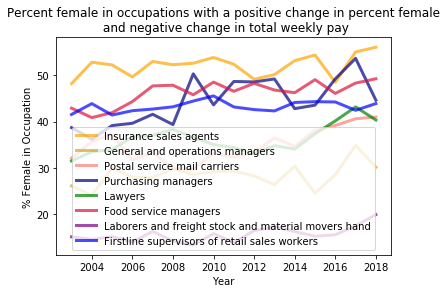

<Figure size 576x432 with 0 Axes>

In [141]:
occs = df_percent_female_pos_total_pay_neg_sorted.index[:8]
title = 'Percent female in occupations with a positive change in percent female\n and negative change in total weekly pay'
plot_percent_female(df_percent_female_pos_total_pay_neg_sorted, occs, colors, title)

After plotting, the first 8 occupations, we identify three occupations with a positive relationship between percent female and time:
- Postal service mail carriers
- Lawyers
- Food service managers

The percent females for these occupations are all in the range of 30% to 50%.

For each of the 3 occupations, we make a two-scale plot of total weekly pay and percent female versus year. 

#### Postal service mail carriers

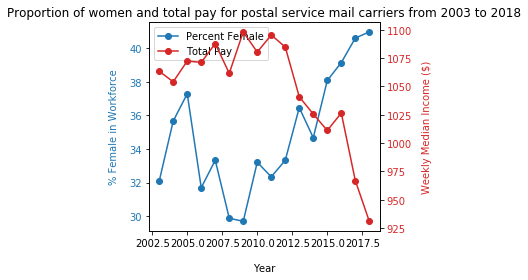

In [145]:
occ = 'Postal service mail carriers'
title = 'Proportion of women and total pay for postal service mail carriers from 2003 to 2018'
plot_percent_female_total_pay(df_percent_female_pos_total_pay_neg_sorted, occ, title)

As the percentage of women in the postal service mail carriers occupation increases over time, the weekly median income decreases. Both lines look like reflections of each other. When percent female decreased from 2005 to 2009, total pay increased. When percent female increased from 2009 to 2018, total pay decreased.  

#### Lawyers

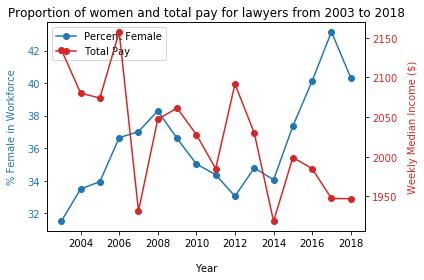

In [146]:
title = 'Proportion of women and total pay for lawyers from 2003 to 2018'
plot_percent_female_total_pay(df_percent_female_pos_total_pay_neg_sorted, 'Lawyers', title)

As the percentage of women in the lawyers occupation increases over time, the weekly median income decreases. Both lines steadily increase and decrease. The total pay decreases by almost \\$200, while percent female increases by almost 10\% (absolute difference). 

#### Food service managers

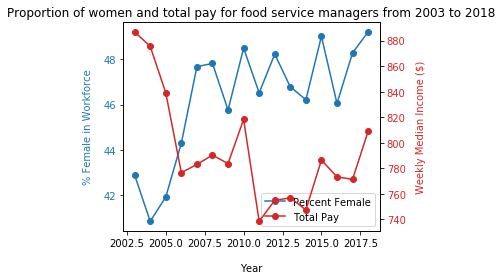

In [147]:
title = 'Proportion of women and total pay for food service managers from 2003 to 2018'
plot_percent_female_total_pay(df_percent_female_pos_total_pay_neg_sorted, 'Food service managers', title)

As the percentage of women in the food service managers occupation increases over time, the weekly median income decreases. Both lines rapidly increase and decrease from 2003 to 2007 before leveling off. Percent female stabilizes at around 47\%, while total pay stabilizes at around \\$760.    

Overall, the three occupations displayed above provide evidence that as more women enter certain occupations, the total median pays for those occupations decrease. Of course, these plots do not prove causation but rather indicate a possible association. 

#### 4.3.3 Occupations with More Women Entering but Worse Pay Gap

We create another `DataFrame` that contains all of the occupations with a positive percent female change (and percent female slope) and positive pay gap change (and pay gap slope). This subset can be used to provide evidence for the observation that as women become more represented in a job, the difference in pay between men and women increases.  

In [148]:
df_percent_female_pos_pay_gap_pos = df_percent_female_pos[(df_percent_female_pos['Pay Gap Change ($)'] > 0) & (df_percent_female_pos['Pay Gap Slope ($/yr)'] > 0)]
print('Number of occupations:', df_percent_female_pos_pay_gap_pos.shape[0])

Number of occupations: 9


There are less than 10. Let's order them in descending order by `Relative Pay Gap Change (%)`.

In [150]:
df_percent_female_pos_pay_gap_pos_sorted = df_percent_female_pos_pay_gap_pos.sort_values(by=['Relative Pay Gap Change (%)'], ascending=False)

Like we did above, before visualizing pay gap, we pick a few occupations from the above data table with percent female values that increase over time.

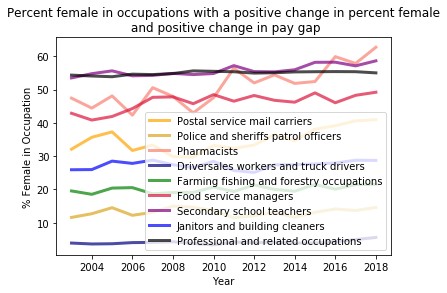

<Figure size 576x432 with 0 Axes>

In [151]:
occs = df_percent_female_pos_pay_gap_pos_sorted.index
title = 'Percent female in occupations with a positive change in percent female\n and positive change in pay gap'
plot_percent_female(df_percent_female_pos_pay_gap_pos_sorted, occs, colors, title)

After plotting, the first 8 occupations, we identify 2 occupations with a positive relationship between percent female and time:
- Postal service mail carriers
- Pharmacists

For each of the 2 occupations, we make a two-scale plot of pay gap and percent female versus year. 

#### Postal service mail carriers

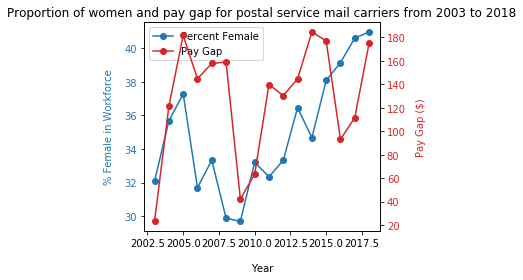

In [152]:
title = 'Proportion of women and pay gap for postal service mail carriers from 2003 to 2018'
plot_percent_female_pay_gap(df_percent_female_pos_pay_gap_pos_sorted, 'Postal service mail carriers', title)

#### Pharmacists

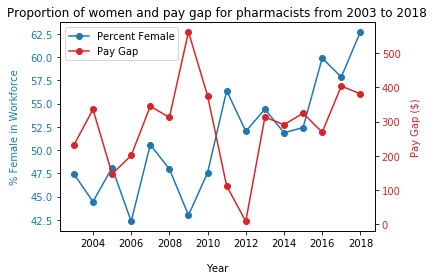

In [153]:
title = 'Proportion of women and pay gap for pharmacists from 2003 to 2018'
plot_percent_female_pay_gap(df_percent_female_pos_pay_gap_pos_sorted, 'Pharmacists', title)

For both postal service mail carriers and pharmacists, as the percentages of women in those occupations increase over time, the pay gaps between male and female median incomes increase. The percentage of female postal service mail carriers increased from around 32% to 41%, while the pay gap increased from \\$20 to \\$100. The percentage of female pharmacists increased from around 48% to 63%, while the pay gap increased from \\$200 to almost \\$400. This means that even as women become more represented in these jobs, men still tend to make more, and the differences are even higher now than they were in the past.   

#### 4.3.4 Occupations with More Women Entering but Smaller Pay Gap

Let's look at some improvements that have been made regarding equal pay! We create another `DataFrame` that contains all of the occupations with a positive percent female change (and percent female slope) and negative pay gap change (and pay gap slope). This subset can be used to provide evidence for the observation that as women become more represented in a job, the difference in pay between men and women decreases (a win-win situation).  

In [154]:
df_percent_female_pos_pay_gap_neg = df_percent_female_pos[(df_percent_female_pos['Pay Gap Change ($)'] < 0) & (df_percent_female_pos['Pay Gap Slope ($/yr)'] < 0)]
print('Number of occupations:', df_percent_female_pos_pay_gap_neg.shape[0])

Number of occupations: 22


There are a few. Let's order them in ascending order by `Relative Pay Gap Change (%)`.

In [155]:
df_percent_female_pos_pay_gap_neg_sorted = df_percent_female_pos_pay_gap_neg.sort_values(by=['Relative Pay Gap Change (%)'], ascending=True)

Just like before, we pick a few occupations from the above data table with percent female values that increase over time.

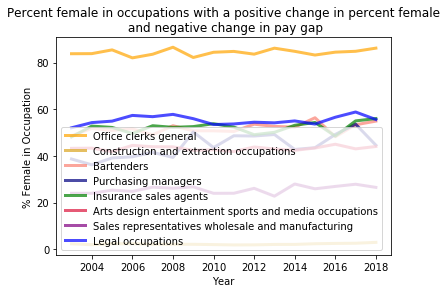

<Figure size 576x432 with 0 Axes>

In [156]:
occs = df_percent_female_pos_pay_gap_neg_sorted.index[:8]
title ='Percent female in occupations with a positive change in percent female\n and negative change in pay gap'
plot_percent_female(df_percent_female_pos_pay_gap_neg_sorted, occs, colors, title)

After plotting, the first 8 occupations, we identify 2 occupations with a positive relationship between percent female and time:
- Purchasing managers
- Insurance sales agents

The percent females for these occupations are...

For each of the 2 occupations, we make a two-scale plot of pay gap and percent female versus year. 

#### Purchasing managers

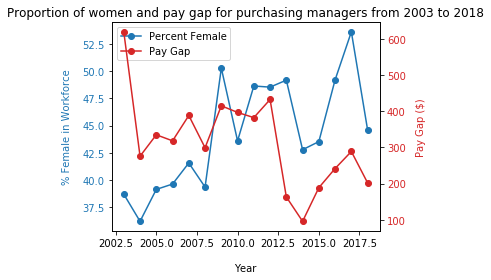

In [157]:
title = 'Proportion of women and pay gap for purchasing managers from 2003 to 2018'
plot_percent_female_pay_gap(df_percent_female_pos_pay_gap_neg_sorted, 'Purchasing managers', title)

#### Insurance sales agents

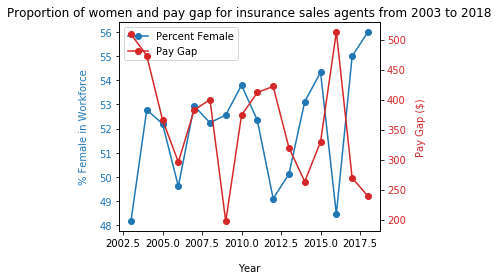

In [158]:
title = 'Proportion of women and pay gap for insurance sales agents from 2003 to 2018'
plot_percent_female_pay_gap(df_percent_female_pos_pay_gap_neg_sorted, 'Insurance sales agents', title)

For both purchasing managers and insurance sales agents, as the percentages of women in those occupations increase over time, the pay gaps between male and female median incomes decrease. The negative relationship between pay gap and year is more apparent for purchasing managers, but even with the big fluctuations in pay gap for insurance sales agents, the downward trend of pay gap is especially apparent in the two ends of the year range. The percentage of female purchasing managers increased from around 38.7% to 44.6%, while the pay gap decreased from \\$620 to \\$200. The percentage of female insurance sales agents increased from around 48% to 56%, while the pay gap decreased from \\$509 to almost \\$239. This means that as women become more represented in these jobs, men tend to make more, but the differences are lower now than they were in the past.

#### 4.3.5 Occupations with Less Women Entering

Instead of just focusing on occupations with positive percent female changes, we create another `DataFrame` that contains all of the occupations with a negative percent female change (and percent female slope), which indicates the occupations that women have less representation in.

In [159]:
df_percent_female_neg = df[(df['Percent Female Change (%)'] < 0) & (df['Percent Female Slope (%/yr)'] < 0)]
print('Number of occupations:', df_percent_female_neg.shape[0])

Number of occupations: 34


There is a substantial number of such occupations. Let's sort them in ascending order of `Relative Percent Female Change (%)`.

In [161]:
df_percent_female_neg_sorted = df_percent_female_neg.sort_values(by=['Relative Percent Female Change (%)'], ascending=True)
df_percent_female_neg_sorted.iloc[:10, -6:]

,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Slope (%/yr),Total Weekly Pay Slope ($/yr),Pay Gap Slope ($/yr)
Occupation,,,,,,
Computer support specialists,-23.582960,5.985531,72.228231,-0.337874,2.505286,8.507424
Advertising sales agents,-23.507262,8.836402,-126.314167,-0.545010,-1.257807,-22.970541
Sales representatives services all other,-21.547328,8.803659,198.053537,-0.387103,3.837735,13.116190
Computer programmers,-20.146964,9.153838,11.657996,-0.361142,6.167582,0.259150
Electrical electronics and electromechanical assemblers,-20.024737,0.466468,29.589681,-0.994573,0.373957,-4.241347
Installation maintenance and repair occupations,-18.394920,1.402871,79.489501,-0.068943,-1.753966,4.074604
Computer and information systems managers,-14.884284,-2.108592,-10.179370,-0.251477,-2.585582,-14.235702
Inspectors testers sorters samplers and weighers,-12.047251,-1.341000,-33.925489,-0.283928,0.166196,-2.723714
Other teachers and instructors,-10.605457,2.679386,-8.666847,-0.112180,-2.457160,2.576158


Compared to the previous data tables, there seems to be much more STEM related occupations in this category, such as computer programmers, computer and mathematical occupations, and electrical electronics and electromechanical assemblers! We can plot the first few with percent female against time.

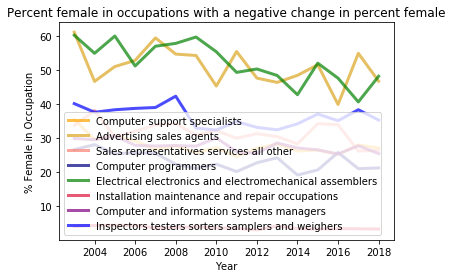

<Figure size 576x432 with 0 Axes>

In [162]:
occs = df_percent_female_neg_sorted.index[:8]
title ='Percent female in occupations with a negative change in percent female'
plot_percent_female(df_percent_female_neg_sorted, occs, colors, title)

The following observations can be made from the above figure:
- Installation maintenance and repair occupations have one of the highest relative decreases in percent female (-18.4%) but has much lower percent female values compared to the other occupations. 	
- Most of the occupations lie in the middle range with percent female varying from 20% to 40%. 
- Advertising sales agents and electrical electronics and electromechanical assemblers both had close to 60% women in 2003. Over time, percent female steadily decreased to 50%.  

Before plotting any two-scale plots, we can break down `df_percent_female_neg` a little more into similar sections like we did for positive female percent change. The following cells include a condensed version of the explorations since the process was already introduced above.    

#### 4.3.6 Occupations with Less Women Entering but Higher Total Pay

In [163]:
df_percent_female_neg_total_pay_pos = df_percent_female_neg[(df_percent_female_neg['Total Weekly Pay Change ($)'] > 0) & (df_percent_female_neg['Total Weekly Pay Slope ($/yr)'] > 0)]
print('Number of occupations:', df_percent_female_neg_total_pay_pos.shape[0])

Number of occupations: 18


An example of an occupation in this section is computer programmers, which we can visualize with a two-scale plot of percent female and total pay.

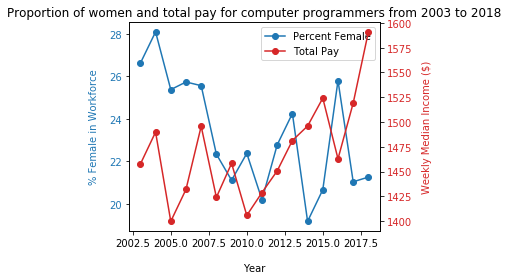

In [164]:
title = 'Proportion of women and total pay for computer programmers from 2003 to 2018'
plot_percent_female_total_pay(df_percent_female_neg_total_pay_pos, 'Computer programmers', title)

For computer programmers, as the percentage of women in this occupation decreases over time, the weekly median income for both genders increases. The percentage of female computer programmers decreased from around 26.6% to 21.3%, while the total pay increased from \\$1458 to \\$1591. This indicates that as women become less represented in this job, the total pay increases.  

#### 4.3.7 Occupations with Less Women Entering and Worse Pay Gap

In [165]:
df_percent_female_neg_pay_gap_pos = df_percent_female_neg[(df_percent_female_neg['Pay Gap Change ($)'] > 0) & (df_percent_female_neg['Pay Gap Slope ($/yr)'] > 0)]
print('Number of occupations:', df_percent_female_neg_pay_gap_pos.shape[0])

Number of occupations: 8


An example of an occupation in this section is computer support specialists, which we can visualize with a two-scale plot of percent female and pay gap.

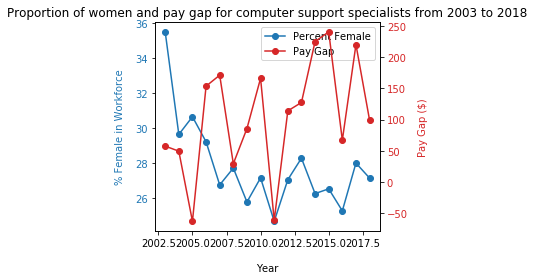

In [166]:
occ = 'Computer support specialists'
title = 'Proportion of women and pay gap for computer support specialists from 2003 to 2018'
plot_percent_female_pay_gap(df_percent_female_neg_sorted, occ, title)

For computer support specialists, as the percentage of women in the occupation decreases over time, the pay gap between male and female median income increases. The percentage of female computer support specialists decreased from around 35.5% to 27%, while the pay gap increased from \\$57.5 to \\$99. This means that as women become less represented in these jobs, men continue to make more, and the differences are even higher now than they were in the past. It is interesting how in 2005 and 2011, the pay gap dropped to almost \-$50, which indicates that women were earning more than men for those years. 

#### 4.3.8 Occupations with Less Women Entering and Smaller Pay Gap

In [167]:
df_percent_female_neg_pay_gap_neg = df_percent_female_neg[(df_percent_female_neg['Pay Gap Change ($)'] < 0) & (df_percent_female_neg['Pay Gap Slope ($/yr)'] < 0)]
print('Number of occupations:', df_percent_female_neg_pay_gap_neg.shape[0])

Number of occupations: 20


An example of an occupation in this section is software developers, which we can visualize with a two-scale plot of percent female and pay gap.

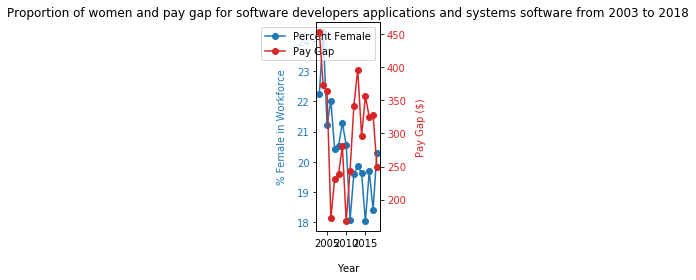

In [168]:
occ = 'Software developers applications and systems software'
title = 'Proportion of women and pay gap for software developers applications and systems software from 2003 to 2018'
plot_percent_female_pay_gap(df_percent_female_neg_sorted, occ, title)

For software developers, as the percentage of women in the occupation decreases over time, the pay gap between male and female median income decreases. The percentage of female software developers decreased from around 22.3% to 20.3%, while the pay gap decreased from \\$453 to \\$250. This means that as women become less represented in these jobs, men continue to make more, but the differences are lower now than they were in the past. 

## 5. Concluding Remarks
The main conclusions from this notebook include:
- From 1979 to 2018, male income was consistently higher than female income, but the pay gap did narrow over time, especially for Asian and white females. 
- In recent years, race plays an even larger role in explaining the pay gap than it did in the past.
- Factors like age and education help narrow the pay gap between men and women. After controlling for these factors, we found that men make around \\$8 more than women per hour.  
- Respondents with difficulties tend to have lower hourly wages compared to respondents without difficulties. 
- In 2018, the percentages of women working in the 10 lowest paid occupations in America were higher on average than the percentages of women working in the 10 highest paid occupations.   
- From 2003 to 2018, the pay gap decreased by 6%, total weekly pay increased by 4.4%, and proportion of women in the workforce increased by 1.3%.
- For a few occupations, we found that as women become more represented in a job, the pay for the job tends to go down. 
- For occupations with increasing female representation, the pay gap can get better or worse.
- More STEM related occupations are associated with a decrease in female representation, especially for computer occupations.
- As the percentage of female software developers decreases, the pay gap also decreases. This could potentially be due the increasing awareness of gender imbalance within high tech companies. A recent example can be found [here](https://www.forbes.com/sites/bizcarson/2017/10/26/three-women-engineers-sue-uber-claiming-unequal-pay-discrimination/#2999778d5bd7).     

Some potential next steps include:
- Delving into more recent STEM occupation data to see how effective various women in STEM programs are. For example, we could ask where the first cohort of Girls Who Code members go when they enter the workforce.  
- Conduct Blinder–Oaxaca decomposition to see what factors directly impact the pay gap.


## 6. Additional Information
Here is a summary of the BLS terms of use:
- The Departments and Agencies providing the data retain version control.
- Once the data has been downloaded, BLS can't vouch for the quality and timeliness of conducted analyses.
- Users should cite the date that data were accessed (3/30/2019).
- State "BLS.gov cannot vouch for the data or analyses derived from these data after the data have been retrieved from BLS.gov."
- Users may not modify or falsely represent content accessed through BLS.gov. 
- BLS has the right to limit access of data to certain users.
- BLS disclaims all warranties of any kind and liabilities.

Since the Bureau of Census and BLS are Federal government agencies, everything they publish, both in hard copy and electronically, is in the public domain, except for copyrighted photographs and illustrations, which we do not use. This means that we are free to use the CPS data tables as long as we follow the terms of use. 

Relevant citations:
- *IPUMS USA, University of Minnesota, www.ipums.org.* 
- “CPS Tables.” *U.S. Bureau of Labor Statistics*, U.S. Bureau of Labor Statistics, 18 Jan. 2019, [www.bls.gov/cps/tables.htm](http://www.bls.gov/cps/tables.htm).